**Semester Long Project Deliverable #1 – The Pitch**

In [1]:
import pandas as pd


from google.colab import drive


drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

data.head()

Mounted at /content/drive


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


**Next Steps**

Mounted at /content/drive
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  F

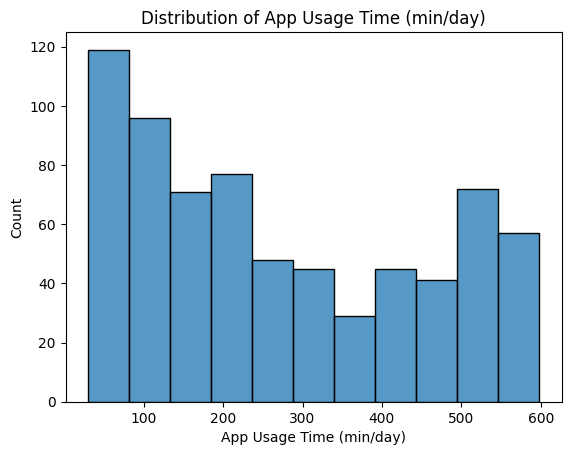

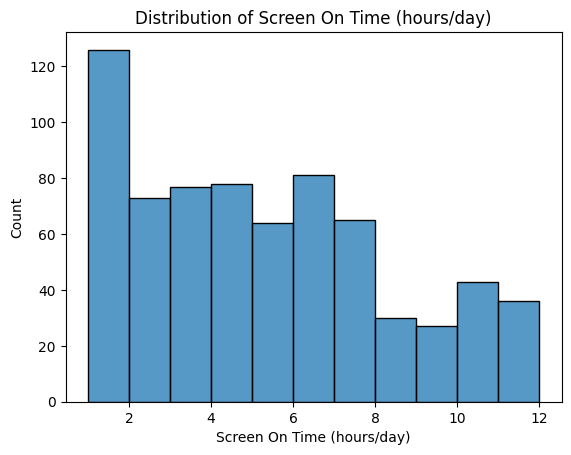

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


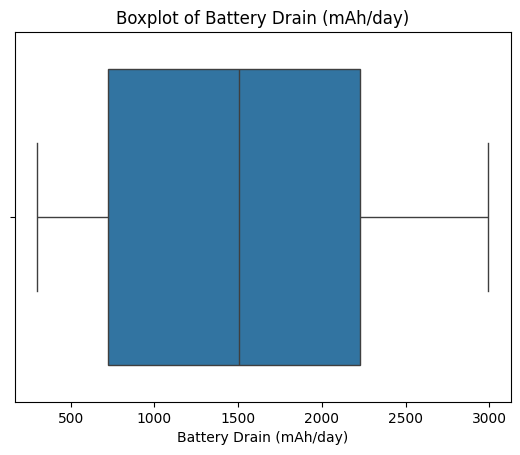

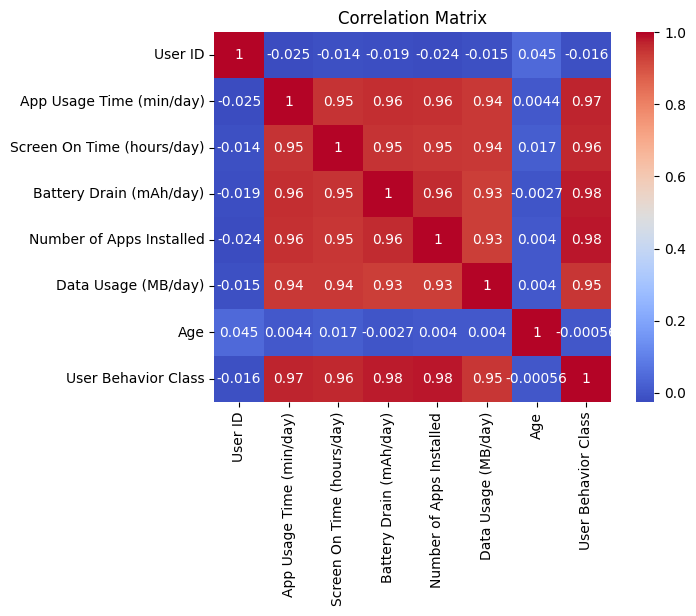

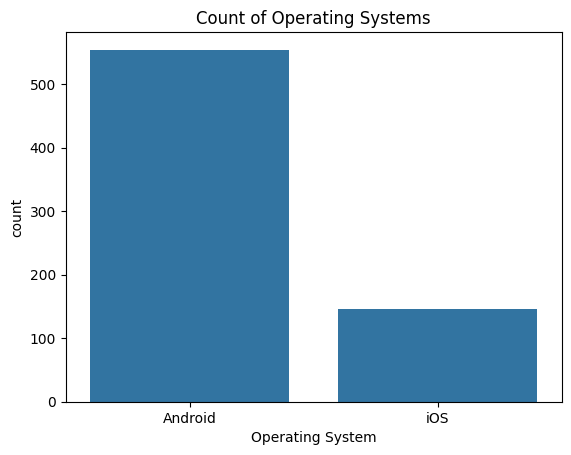

T-statistic: 39.68877459278398, P-value: 2.47028955582671e-231
Model Accuracy: 1.0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from google.colab import drive
drive.mount('/content/drive', force_remount=True)


data = pd.read_csv('/content/drive/My Drive/user_behavior_dataset.csv')

print(data.head())


print(data.info())


print(data.describe())


print(data.isnull().sum())


data = data.drop_duplicates()


sns.histplot(data['App Usage Time (min/day)'])
plt.title('Distribution of App Usage Time (min/day)')
plt.show()

sns.histplot(data['Screen On Time (hours/day)'])
plt.title('Distribution of Screen On Time (hours/day)')
plt.show()


sns.boxplot(x='Battery Drain (mAh/day)', data=data)
plt.title('Boxplot of Battery Drain (mAh/day)')
plt.show()

numeric_data = data.select_dtypes(include=[float, int])


corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.countplot(x='Operating System', data=data)
plt.title('Count of Operating Systems')
plt.show()


t_stat, p_val = stats.ttest_ind(data['App Usage Time (min/day)'], data['Screen On Time (hours/day)'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

